### Explore the exoplanetary data

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [6]:
data = pd.read_csv("exoplanets.csv", comment='#')
#data.loc[(data['pl_bmassj'] >= 0.0) & (data['pl_bmassj'] <= 0.5657)]

/home/atharva/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (4,5,10,11,17,18,23,24,26,27,30,33,38,39,44,45,50,51,56,57,62,63,70,71,73,74,79,80,81,82,88,89,95,96,105,106,109,110,115,116,124,125,130,131,137,143,144,149,150,159,160,161,162,172,173,174,179,180,182,188,189,195,196,201,202,205,206,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,268,269,270,271,273,278,279,284,285,290,291,294,295,301,302,304,305,310,311) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
data['pl_radj']

KeyError: 'pl_radj'

In [7]:
# Solar system planetary data
planets = np.array(['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune'])
rad_pl = np.array([4879., 12104., 12756., 6792., 142984., 120536., 51118., 49528.], dtype=np.float) #Kms
orb_per = np.array([88., 224.7, 365.2, 687., 4331., 10747., 30589., 59800.], dtype=np.float) #Days
semi_mj = np.array([0.3871, 0.7233, 1.000, 1.5273, 5.2028, 9.5388, 19.1914, 30.0611], dtype=np.float) #AU
mass_pl = np.array([0.330, 4.87, 5.97, 0.642, 1898, 568, 86.8, 102], dtype=np.float) # x10^24 kg
dens = np.array([5.4, 5.2, 5.5, 3.9, 1.3, 0.7, 1.3, 1.6], dtype=np.float) #gm/cm^3

for i in range(len(planets)):
    pl_mass_jup = mass_pl / mass_pl[4]
    pl_rad_jup = rad_pl / rad_pl[4]

KeyError: 'pl_bmassj'

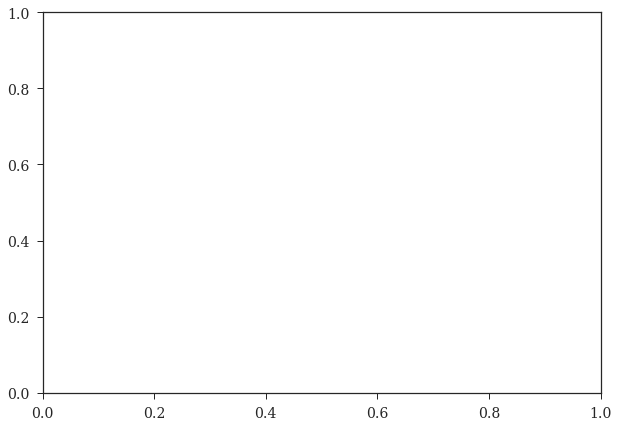

In [8]:
sns.set(font='serif', font_scale=1.4, style='ticks')
palette = sns.hls_palette(8, l=.3, s=.8)
pal = palette.as_hex()

# Planetary Mass
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(data['pl_bmassj'].dropna(), bins=np.logspace(np.log10(0.001),np.log10(30.0), 25),
             kde=False, rug=False, #color='darkcyan',
             hist_kws={"edgecolor": "k", "linewidth": 1.5, "alpha": 0.5})
#plt.hist(data['pl_bmassj'].dropna(), bins=np.logspace(np.log10(0.001),np.log10(30.0), 40))
plt.axvline(pl_mass_jup[2], linestyle = 'dashed', label = planets[2], c=pal[0])
plt.axvline(pl_mass_jup[5], linestyle = 'dashed', label = planets[5], c=pal[5])

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.xlabel(r'Planet Mass ($M_{Jup}$)')
plt.ylabel('Number of planets')
ax.set_xscale('log')

plt.legend()
plt.show()

# Planetary Radius
fig, ax = plt.subplots(figsize=(10,7))
sns.distplot(data['pl_radj'].dropna(), bins=np.logspace(np.log10(0.01),np.log10(10.0), 25),
             kde=False, rug=False, 
             hist_kws={"edgecolor": "k", "linewidth": 1.5, "alpha": 0.5})
plt.axvline(pl_rad_jup[2], linestyle = 'dashed', label = planets[2], c=pal[0])
plt.axvline(pl_rad_jup[7], linestyle = 'dashed', label = planets[7], c=pal[5])

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.xlabel(r'Planet Radius ($M_{Jup}$)')
plt.ylabel('Number of planets')
ax.set_xscale('log')
plt.legend()
plt.show()

# Different sized planets 
bins = [0.0, 0.8, 1.25, 2.0, 4.0, 6.0, 12.0]
hist, bin_edges = np.histogram(data['pl_radj'].dropna() * pl_rad_jup[4]/pl_rad_jup[2], bins) # make the histogram
fig, ax = plt.subplots(figsize=(10,7))

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)), hist, width=0.9) 

# Set the ticks to the middle of the bars
ax.set_xticks([0.04+i for i,j in enumerate(hist)])
# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.xlabel('Planet Size (Relative to Earth)')
plt.ylabel('Number of planets')
plt.show()

In [ ]:
# Orbital period

fig, ax = plt.subplots(figsize=(10,7))

sns.distplot(data['pl_orbper'].dropna(), bins=np.logspace(np.log10(0.01),np.log10(100000.0), 40),
             kde=False, rug=False, 
             hist_kws={"edgecolor": "k", "linewidth": 1.5, "alpha": 0.5})

plt.axvline(orb_per[0], linestyle = 'dashed', label = planets[0], c=pal[0])
plt.axvline(orb_per[2], linestyle = 'dashed', label = planets[2], c=pal[2])
plt.axvline(orb_per[4], linestyle = 'dashed', label = planets[4], c=pal[5])
plt.axvline(orb_per[7], linestyle = 'dashed', label = planets[7], c=pal[7])

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.xlabel('Orbital Period (days)')
plt.ylabel('Number of planets')
ax.set_xscale('log')

plt.legend()
plt.show()

In [ ]:
# Separation from the parent star

fig, ax = plt.subplots(figsize=(10,7))

sns.distplot(data['pl_orbsmax'].dropna(), bins=np.logspace(np.log10(0.001),np.log10(1000.0), 40),
             kde=False, rug=False, 
             hist_kws={"edgecolor": "k", "linewidth": 1.5, "alpha": 0.5})

plt.axvline(semi_mj[0], linestyle = 'dashed', label = planets[0], c=pal[0])
plt.axvline(semi_mj[2], linestyle = 'dashed', label = planets[2], c=pal[2])
plt.axvline(semi_mj[4], linestyle = 'dashed', label = planets[4], c=pal[5])
plt.axvline(semi_mj[7], linestyle = 'dashed', label = planets[7], c=pal[7])

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.xlabel('Separation from the parent Star (AU)')
plt.ylabel('Number of planets')
ax.set_xscale('log')

plt.legend()
plt.show()

In [ ]:
# Separation from the parent star

fig, ax = plt.subplots(figsize=(10,7))

sns.distplot(data['pl_dens'].dropna(), bins=np.logspace(np.log10(0.01),np.log10(100.0), 40),
             kde=False, rug=False, 
             hist_kws={"edgecolor": "k", "linewidth": 1.5, "alpha": 0.5})

plt.axvline(dens[2], linestyle = 'dashed', label = planets[2], c=pal[2])
plt.axvline(dens[4], linestyle = 'dashed', label = planets[4], c=pal[5])
plt.axvline(dens[5], linestyle = 'dashed', label = planets[5], c=pal[7])

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
plt.xlabel(r'Planet Density ($g/cm^3$)')
plt.ylabel('Number of planets')
ax.set_xscale('log')

plt.legend()
plt.show()

In [ ]:
df_per_sep = data.dropna(subset=['pl_orbper', 'pl_orbsmax'])

In [ ]:
from adjustText import adjust_text

user_col = ['maroon', 'saddlebrown', 'darkgreen', 'teal', 'blue', 'black', 'purple', 'olivedrab']
fig, ax = plt.subplots(figsize=(10,7))

plt.xlabel(r'$R^3 (AU^3)$')
plt.ylabel(r'$T^2 (days^2)$')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(df_per_sep['pl_orbsmax']**3, df_per_sep['pl_orbper']**2)
for i in range(len(orb_per)):
    ax.scatter(semi_mj[i]**3, orb_per[i]**2, c=user_col[i], s=100.5)
    ax.text((semi_mj[i])**3, (orb_per[i])**2, planets[i],
            color='k', fontsize=12, fontweight='bold')
    texts = []
    for x, y, s in zip(eucs, covers, text):
        texts.append(plt.text(x, y, s))

adjust_text(planets[i], only_move='y', arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

plt.show()

In [ ]:
sns.regplot(df_per_sep['pl_orbsmax']**3, df_per_sep['pl_orbper']**2)